## ***Mushroom Dataset: EDA  and Machine Learning.***

> ***1: Exploratory Data Analysis***
 
> ***2: Machine Learning Techiques***

> ***3: Recommendation Model(PySpark-ALS)***





In [2]:
pip install pyspark

  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805913 sha256=2750ca93fc4811ec30971164c4b05d13a912fc8c573fba04f3334567a08783f7
  Stored in directory: c:\users\gabri\appdata\local\pip\cache\wheels\23\f6\d3\110e53bd43baeb8d7d38049733d48e39cbecd056f01dba7ee8
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.Installing collected packages: py4j, pyspark



You should consider upgrading via the 'C:\Users\gabri\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
from pyspark.sql import SparkSession

In [ ]:
#Creating Spark Session
spark = SparkSession.builder.appName('rec').getOrCreate()

In [ ]:
data = spark.read.csv('mushrooms.csv',inferSchema=True,header=True)
data.show()

+-----+---------+-----------+---------+-------+----+---------------+------------+---------+----------+-----------+----------+------------------------+------------------------+----------------------+----------------------+---------+----------+-----------+---------+-----------------+----------+-------+
|class|cap-shape|cap-surface|cap-color|bruises|odor|gill-attachment|gill-spacing|gill-size|gill-color|stalk-shape|stalk-root|stalk-surface-above-ring|stalk-surface-below-ring|stalk-color-above-ring|stalk-color-below-ring|veil-type|veil-color|ring-number|ring-type|spore-print-color|population|habitat|
+-----+---------+-----------+---------+-------+----+---------------+------------+---------+----------+-----------+----------+------------------------+------------------------+----------------------+----------------------+---------+----------+-----------+---------+-----------------+----------+-------+
|    p|        x|          s|        n|      t|   p|              f|           c|        n|   

In [ ]:
print(("Rows = "+str(data.count())+"\nColumns = "+str(len(data.columns))))

Rows = 8124
Columns = 23


In [ ]:
df = data.toPandas() 

In [ ]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
#Importing libraries for exploratory data analysis
from matplotlib import pyplot as plt 
import os
import numpy as np
import pandas as pd 

# **Description of Dataset (EDA)**

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

# **Data Exploratory Data Analysis**

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
for col in df:
    print("Column Name: ", col)
    print(df[col].value_counts())
    print('\n\n')

Column Name:  class
e    4208
p    3916
Name: class, dtype: int64



Column Name:  cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64



Column Name:  cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64



Column Name:  cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64



Column Name:  bruises
f    4748
t    3376
Name: bruises, dtype: int64



Column Name:  odor
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64



Column Name:  gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64



Column Name:  gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64



Column Name:  gill-size
b    5612
n    2512
Name: gill-size, dtype: int64



Column Name:  gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


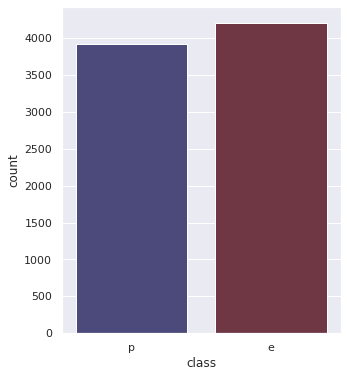

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


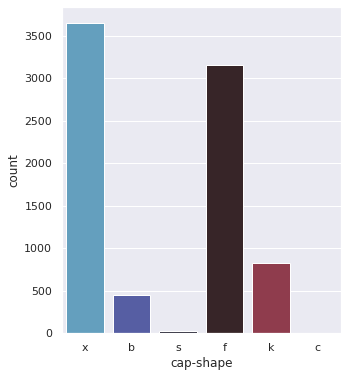

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


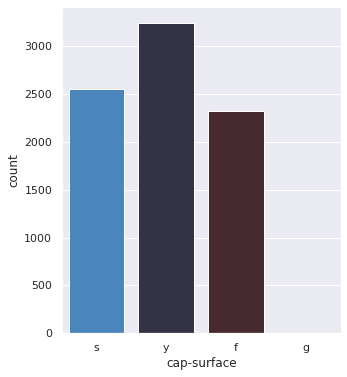

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


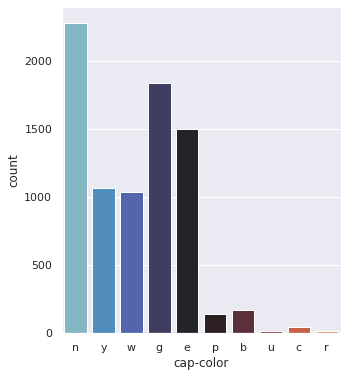

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


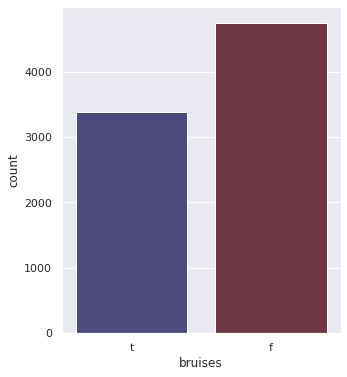

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


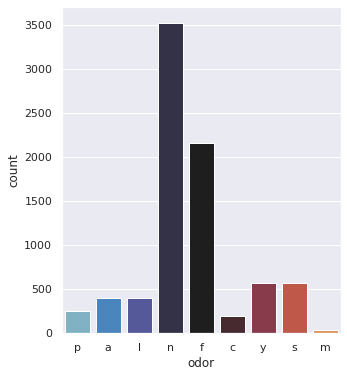

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


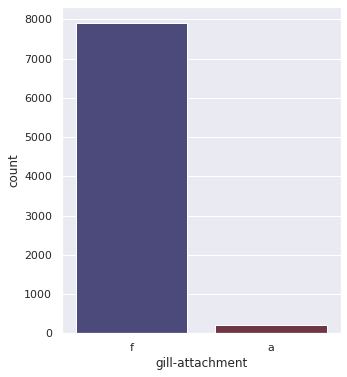

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


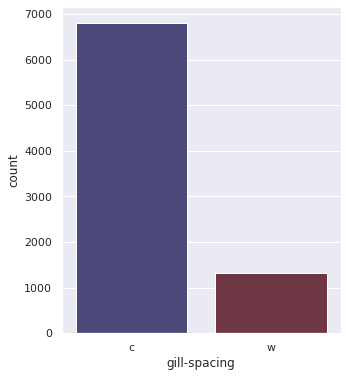

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


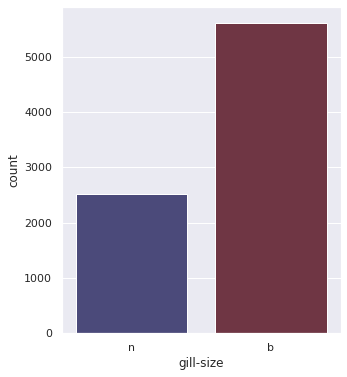

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


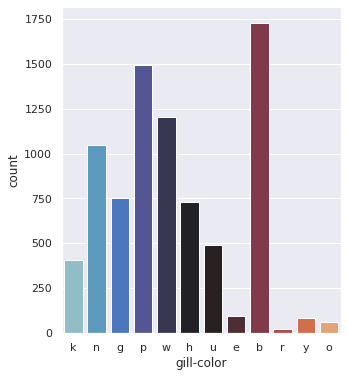

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


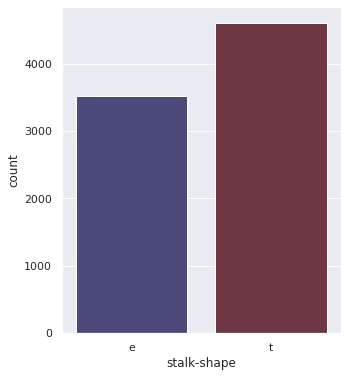

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


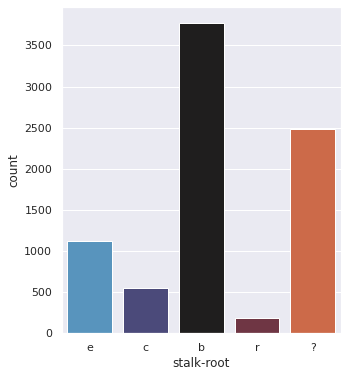

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


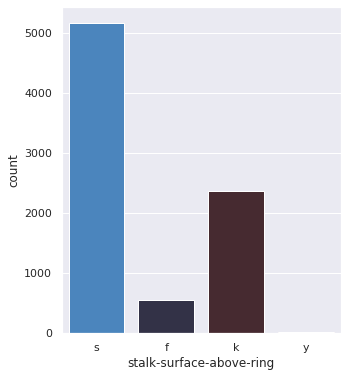

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


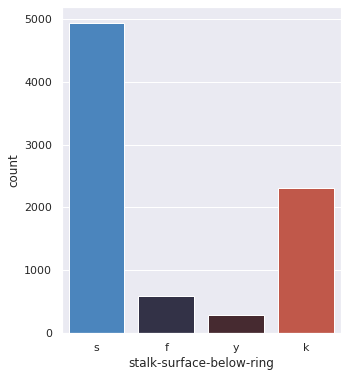

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


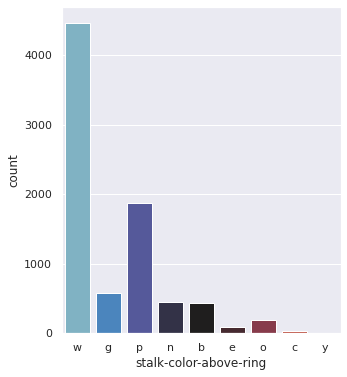

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


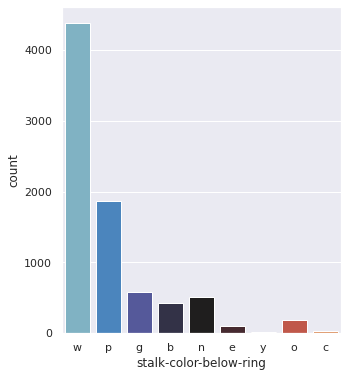

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


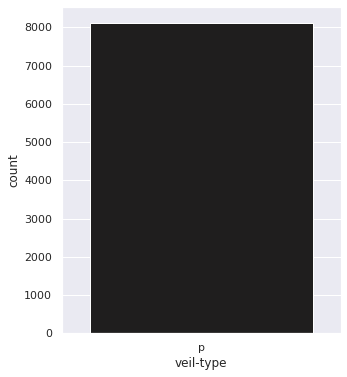

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


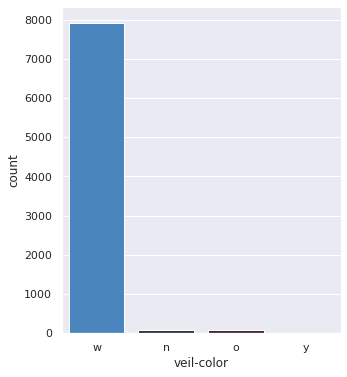

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


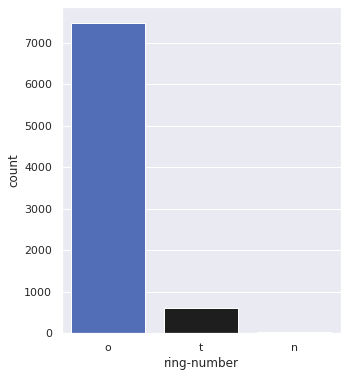

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


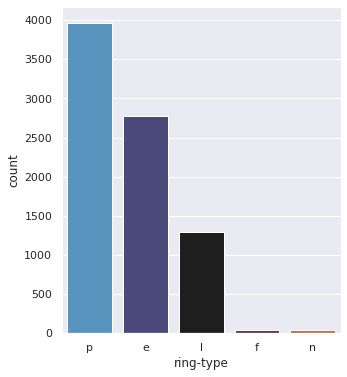

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


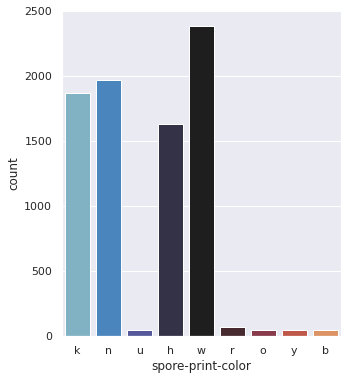

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


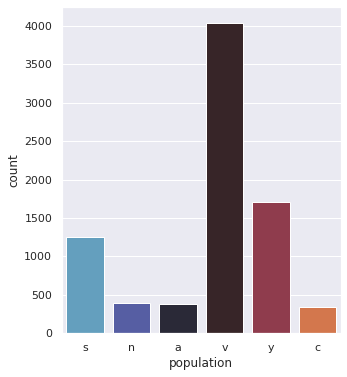

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


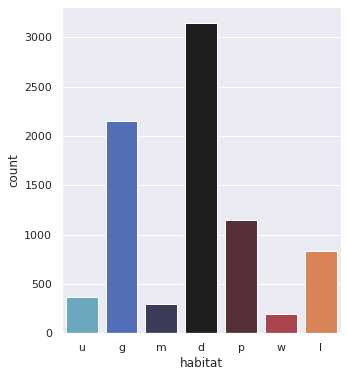

In [ ]:
import seaborn as sns
for col in df.columns:
    sns.set(rc={'figure.figsize':(5,6)})
    sns.countplot(df[col], palette='icefire')
    plt.show()

In [ ]:
from sklearn import metrics
from sklearn import preprocessing

from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import kurtosis
from scipy.stats import skew

### **Performing Label Encoding on the given dataset**

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(columns=df.columns, data=LabelEncoder().fit_transform(df.values.flatten()).reshape(df.shape))
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,14,21,16,12,17,14,6,3,12,9,5,5,16,16,20,20,14,20,13,14,9,16,18
1,5,21,16,22,17,1,6,3,2,9,5,3,16,16,20,20,14,20,13,14,12,12,7
2,5,2,16,20,17,10,6,3,2,12,5,3,16,16,20,20,14,20,13,14,12,12,11
3,14,21,22,20,17,14,6,3,12,12,5,5,16,16,20,20,14,20,13,14,9,16,18
4,5,21,16,7,6,12,6,20,2,9,17,5,16,16,20,20,14,20,13,5,12,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,5,9,16,12,6,12,1,3,2,22,5,0,16,16,13,13,14,13,13,14,2,3,10
8120,5,21,16,12,6,12,1,3,2,22,5,0,16,16,13,13,14,12,13,14,2,19,10
8121,5,6,16,12,6,12,1,3,2,12,5,0,16,16,13,13,14,13,13,14,2,3,10
8122,14,9,22,12,6,22,6,3,12,2,17,0,16,9,20,20,14,20,13,5,20,19,10


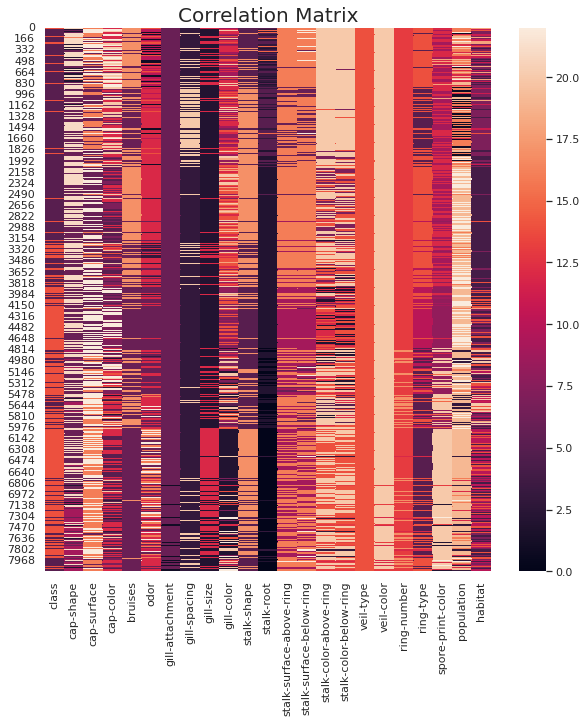

In [ ]:
f,data = plt.subplots(figsize= [10,10])
data = sns.heatmap(df)
data.set_title("Correlation Matrix", fontsize=20)
plt.show()

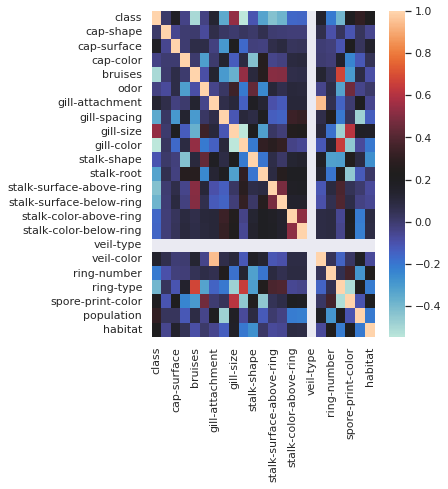

In [ ]:
sns.heatmap(df.corr(), cmap='icefire')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


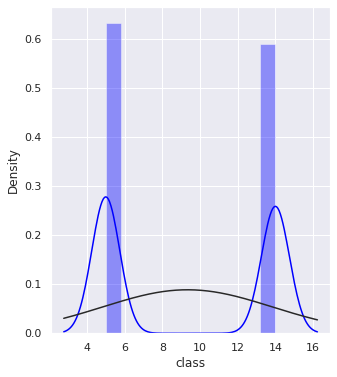

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


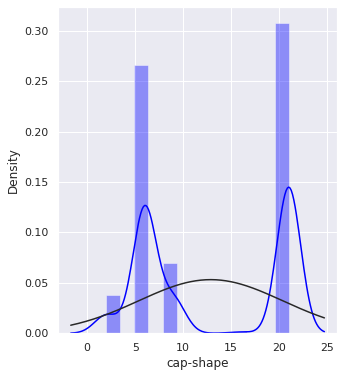

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


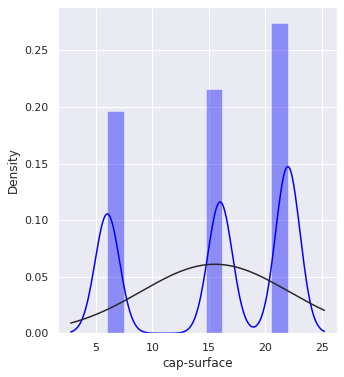

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


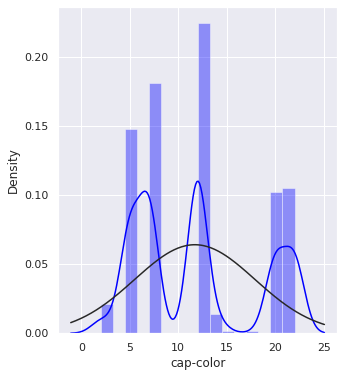

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


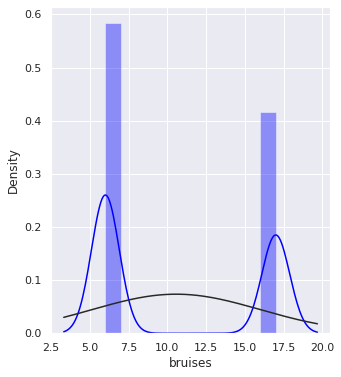

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


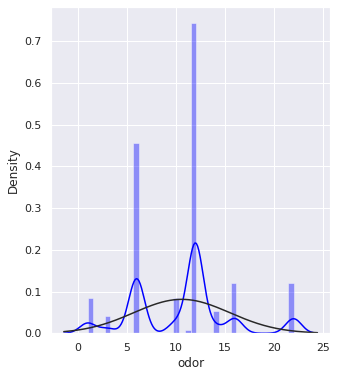

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


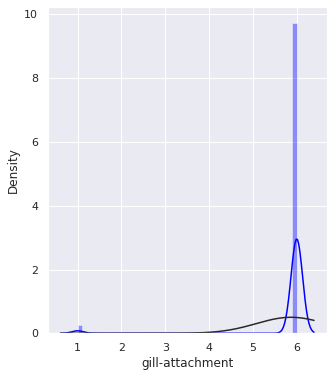

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


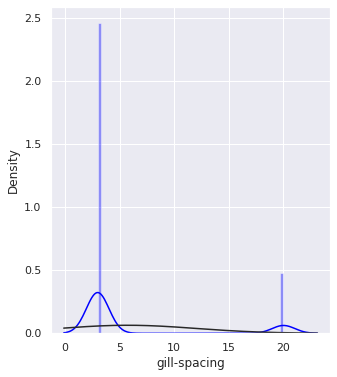

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


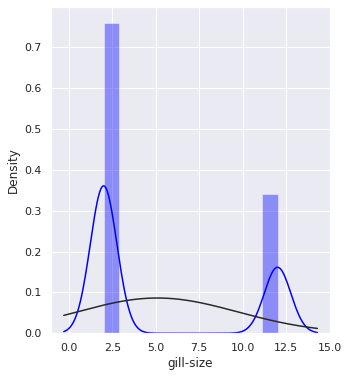

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


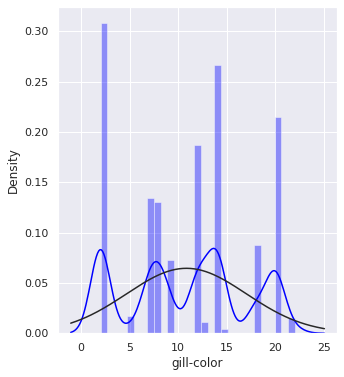

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


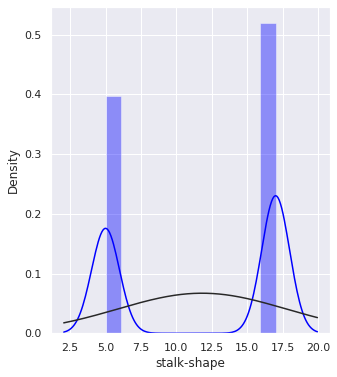

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


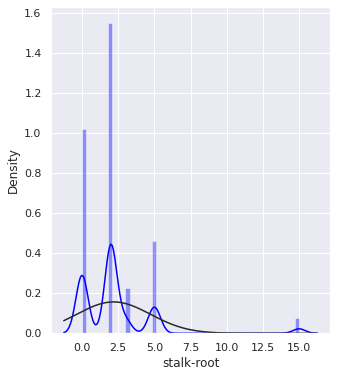

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


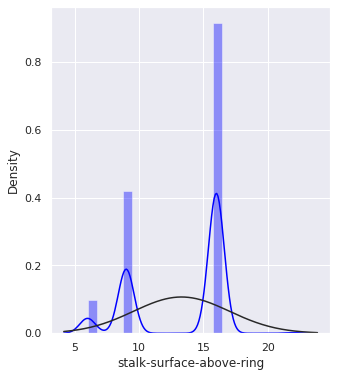

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


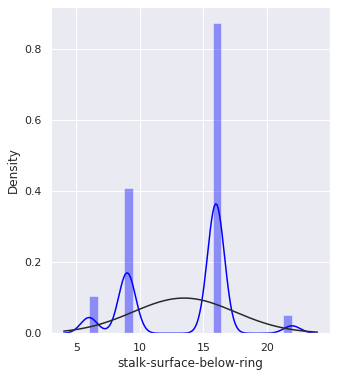

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


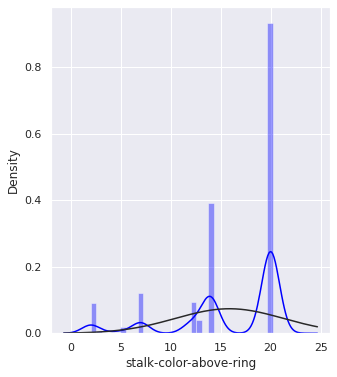

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


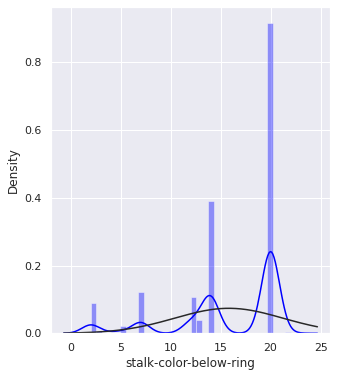

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


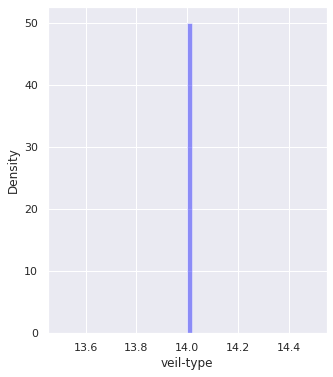

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


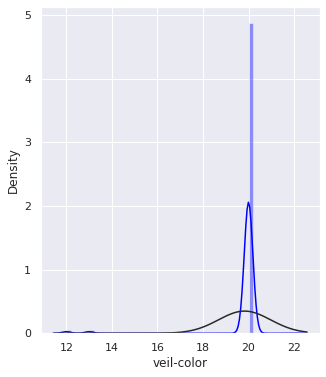

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


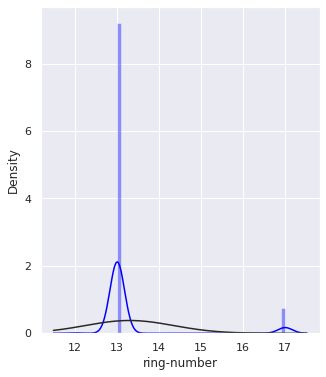

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


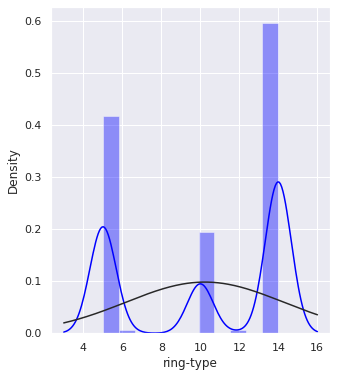

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


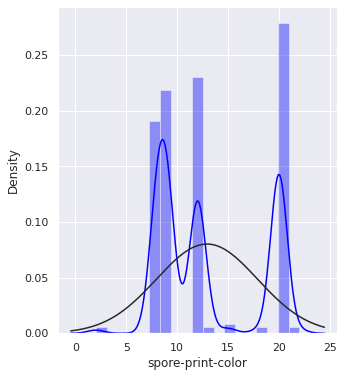

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


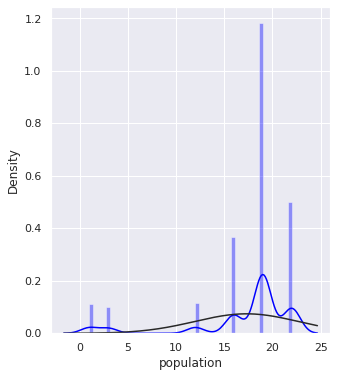

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


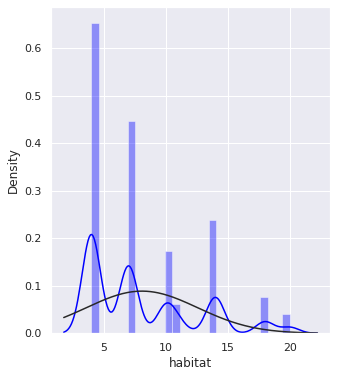

In [ ]:
for col in df.columns:
    sns.set(rc={'figure.figsize':(5,6)})
    sns.distplot(df[col], fit=norm, color = 'blue')
    plt.show()

In [ ]:
print("Skewness coeff. is= %f" % df['class'].skew())
print("Kurtosis coeff. is= %f" % df['class'].kurt())

Skewness coeff. is= 0.071946
Kurtosis coeff. is= -1.995315


In [ ]:
for col in df.columns:
  Q1=df[col].quantile(0.05)
  Q3=df[col].quantile(0.95)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df.loc[df[col]<lower_bound, col]=lower_bound
  df.loc[df[col]>upper_bound, col]=upper_bound
  print("Column",col,"\n  Lower Bound",lower_bound,"\n  Upper Bound",upper_bound,"\n")

Column class 
  Lower Bound -8.5 
  Upper Bound 27.5 

Column cap-shape 
  Lower Bound -26.5 
  Upper Bound 49.5 

Column cap-surface 
  Lower Bound -18.0 
  Upper Bound 46.0 

Column cap-color 
  Lower Bound -20.5 
  Upper Bound 47.5 

Column bruises 
  Lower Bound -10.5 
  Upper Bound 33.5 

Column odor 
  Lower Bound -25.5 
  Upper Bound 50.5 

Column gill-attachment 
  Lower Bound 6.0 
  Upper Bound 6.0 

Column gill-spacing 
  Lower Bound -22.5 
  Upper Bound 45.5 

Column gill-size 
  Lower Bound -13.0 
  Upper Bound 27.0 

Column gill-color 
  Lower Bound -25.0 
  Upper Bound 47.0 

Column stalk-shape 
  Lower Bound -13.0 
  Upper Bound 35.0 

Column stalk-root 
  Lower Bound -7.5 
  Upper Bound 12.5 

Column stalk-surface-above-ring 
  Lower Bound -9.0 
  Upper Bound 31.0 

Column stalk-surface-below-ring 
  Lower Bound -9.0 
  Upper Bound 31.0 

Column stalk-color-above-ring 
  Lower Bound -25.0 
  Upper Bound 47.0 

Column stalk-color-below-ring 
  Lower Bound -25.0 
  Upper 

In [ ]:
for col in df.columns:
  df[col]= df[col].astype(int)
df.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

# **Machine Learning Models**

# **1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Y=df['class'].values
X=df.drop(['class'],axis=1).values
std=preprocessing.StandardScaler()
std.fit(X)
X_transform=std.transform(X)
X_train,X_valid,Y_train,Y_valid=train_test_split(X_transform,Y,test_size=0.20,random_state=42)
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_train_pred=model.predict(X_train)
Y_valid_pred=model.predict(X_valid)
## Evaluation Metrics
accuracy1=metrics.accuracy_score(Y_train,Y_train_pred)
accuracy2=metrics.accuracy_score(Y_valid,Y_valid_pred)
f1=metrics.f1_score(Y_train,Y_train_pred,average='weighted')
f22=metrics.f1_score(Y_valid,Y_valid_pred,average='weighted')
print("Train accuracy",accuracy1*100)
print("Train F1 Score",f1)
print("Test accuracy",accuracy2*100)
print("Test f1 score",f22)

Train accuracy 94.2606554854593
Train F1 Score 0.942585138782909
Test accuracy 94.03076923076922
Test f1 score 0.9403140293374027


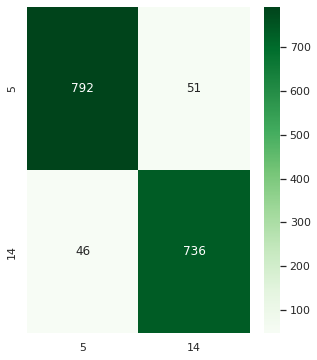

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict(X_valid)
true_labels = Y_valid
cf_matrix = confusion_matrix(true_labels, predictions)
heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Greens', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

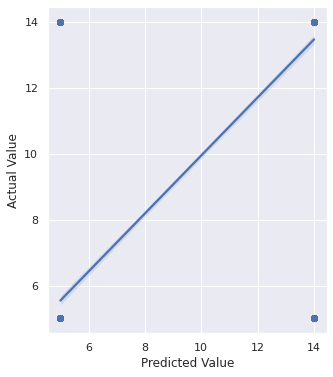

In [ ]:
sns.regplot(x=Y_valid,y=Y_valid_pred)
sns.set_theme(color_codes=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# **2. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
Y=df['class'].values
X=df.drop(['class'],axis=1).values
std=preprocessing.StandardScaler()
std.fit(X)
X_transform=std.transform(X)
X_train,X_valid,Y_train,Y_valid=train_test_split(X_transform,Y,test_size=0.20,random_state=42)
params={'weights': ['uniform', 'distance'],'n_neighbors': [3,4,5,6,7,8,9]}
model=KNeighborsClassifier()
model_tuning=GridSearchCV(model,params)
model_tuning.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [ ]:
Y_train_pred=model_tuning.predict(X_train)
Y_valid_pred=model_tuning.predict(X_valid)
## Evaluation Metrics
accuracy1=metrics.accuracy_score(Y_train,Y_train_pred)
accuracy2=metrics.accuracy_score(Y_valid,Y_valid_pred)
f1=metrics.f1_score(Y_train,Y_train_pred,average='weighted')
f22=metrics.f1_score(Y_valid,Y_valid_pred,average='weighted')
print("Train accuracy",accuracy1*100)
print("Train F1 Score",f1)
print("Test accuracy",accuracy2*100)
print("Test f1 score",f22)

Train accuracy 100.0
Train F1 Score 1.0
Test accuracy 100.0
Test f1 score 1.0


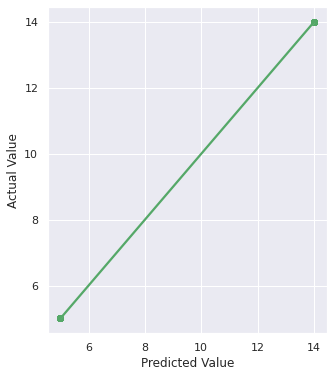

In [ ]:
sns.regplot(x=Y_valid,y=Y_valid_pred,color = 'g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# **3. Decision Tree Classifier**



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
Y=df['habitat'].values
X=df.drop(['habitat'],axis=1).values
std=preprocessing.StandardScaler()
std.fit(X)
X_transform=std.transform(X)
X_train,X_valid,Y_train,Y_valid=train_test_split(X_transform,Y,test_size=0.25,random_state=42)
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
Y_train_pred=model.predict(X_train)
Y_valid_pred=model.predict(X_valid)
## Evaluation Metrics
accuracy1=metrics.accuracy_score(Y_train,Y_train_pred)
accuracy2=metrics.accuracy_score(Y_valid,Y_valid_pred)
f1=metrics.f1_score(Y_train,Y_train_pred,average='weighted')
f22=metrics.f1_score(Y_valid,Y_valid_pred,average='weighted')
print("Train accuracy",accuracy1*100)
print("Train F1 Score",f1)
print("Test accuracy",accuracy2*100)
print("Test f1 score",f22)

Train accuracy 73.31363860167404
Train F1 Score 0.6839173413966314
Test accuracy 47.90743476120138
Test f1 score 0.4562202449597834


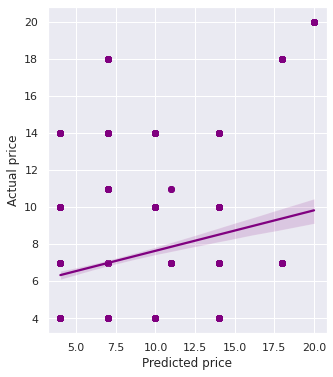

In [ ]:
sns.regplot(x=Y_valid,y=Y_valid_pred,color='purple')
plt.xlabel('Predicted price')
plt.ylabel('Actual price')
plt.show()

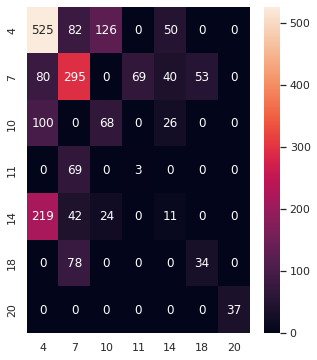

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict(X_valid)
true_labels = Y_valid
cf_matrix = confusion_matrix(true_labels, predictions)
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

# **4. Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
Y=df['class'].values
X=df.drop(['class'],axis=1).values
std=preprocessing.StandardScaler()
std.fit(X)
X_transform=std.transform(X)
X_train,X_valid,Y_train,Y_valid=train_test_split(X_transform,Y,test_size=0.20,random_state=42)
params={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
model=RandomForestClassifier()
model_tuning=GridSearchCV(model,params,cv=5,n_jobs=-1,verbose=2)
model_tuning.fit(X_train,Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=2)

In [ ]:
Y_train_pred=model_tuning.predict(X_train)
Y_valid_pred=model_tuning.predict(X_valid)
## Evaluation Metrics
accuracy1=metrics.accuracy_score(Y_train,Y_train_pred)
accuracy2=metrics.accuracy_score(Y_valid,Y_valid_pred)
f1=metrics.f1_score(Y_train,Y_train_pred,average='weighted')
f22=metrics.f1_score(Y_valid,Y_valid_pred,average='weighted')
print("Train accuracy",accuracy1*100)
print("Train F1 Score",f1)
print("Test accuracy",accuracy2*100)
print("Test f1 score",f22)

Train accuracy 100.0
Train F1 Score 1.0
Test accuracy 100.0
Test f1 score 1.0


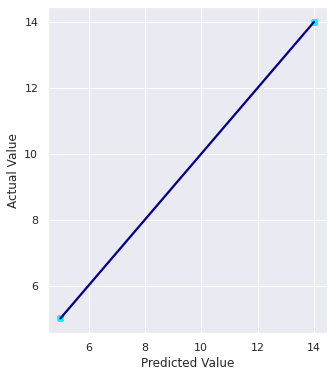

In [ ]:
sns.regplot(x=Y_valid,y=Y_valid_pred, scatter_kws={"color": "cyan"}, line_kws={"color": "darkblue"})
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

# **Recommendation System Using PySpark (ALS Model)**


In [ ]:
#Importing pySpark ALS model
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

In [ ]:
df.reset_index(level=0, inplace=True)
df.rename(columns = {'index':'ID'}, inplace = True)
df

,ID,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,14,21,16,12,17,14,6,3,12,9,5,5,16,16,20,20,14,20,13,14,9,16,18
1,1,5,21,16,22,17,1,6,3,2,9,5,3,16,16,20,20,14,20,13,14,12,12,7
2,2,5,2,16,20,17,10,6,3,2,12,5,3,16,16,20,20,14,20,13,14,12,12,11
3,3,14,21,22,20,17,14,6,3,12,12,5,5,16,16,20,20,14,20,13,14,9,16,18
4,4,5,21,16,7,6,12,6,20,2,9,17,5,16,16,20,20,14,20,13,5,12,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,5,9,16,12,6,12,6,3,2,22,5,0,16,16,13,13,14,20,13,14,2,3,10
8120,8120,5,21,16,12,6,12,6,3,2,22,5,0,16,16,13,13,14,20,13,14,2,19,10
8121,8121,5,6,16,12,6,12,6,3,2,12,5,0,16,16,13,13,14,20,13,14,2,3,10
8122,8122,14,9,22,12,6,22,6,3,12,2,17,0,16,9,20,20,14,20,13,5,20,19,10


In [ ]:
data=spark.createDataFrame(df)
(training, test) = data.randomSplit([0.8, 0.2])

In [ ]:
als = ALS(maxIter=5, regParam=0.1, userCol="ID", itemCol="odor", ratingCol="class",rank=10, seed=0, nonnegative=True)
model = als.fit(data)

In [ ]:
predictions = model.transform(test)

In [ ]:
from pyspark.sql.functions import col
predictions = predictions.withColumnRenamed("prediction","predictedClassValue")
predictions.show()

+---+-----+---------+-----------+---------+-------+----+---------------+------------+---------+----------+-----------+----------+------------------------+------------------------+----------------------+----------------------+---------+----------+-----------+---------+-----------------+----------+-------+-------------------+
| ID|class|cap-shape|cap-surface|cap-color|bruises|odor|gill-attachment|gill-spacing|gill-size|gill-color|stalk-shape|stalk-root|stalk-surface-above-ring|stalk-surface-below-ring|stalk-color-above-ring|stalk-color-below-ring|veil-type|veil-color|ring-number|ring-type|spore-print-color|population|habitat|predictedClassValue|
+---+-----+---------+-----------+---------+-------+----+---------------+------------+---------+----------+-----------+----------+------------------------+------------------------+----------------------+----------------------+---------+----------+-----------+---------+-----------------+----------+-------+-------------------+
| 26|    5|       21| 

In [ ]:
predictions.select(['ID','Class','Odor','predictedClassValue']).show()

+---+-----+----+-------------------+
| ID|Class|Odor|predictedClassValue|
+---+-----+----+-------------------+
| 26|    5|   1|           4.834765|
|  1|    5|   1|           4.834765|
| 20|    5|   1|           4.834765|
| 57|    5|   1|           4.834765|
| 50|    5|   1|           4.834765|
| 73|    5|   1|           4.834765|
| 52|    5|  10|          4.6800923|
| 41|    5|  10|          4.6800923|
| 72|    5|  10|          4.6800923|
| 10|    5|  10|          4.6800923|
| 77|    5|  10|          4.6800923|
| 24|    5|  10|          4.6800923|
| 70|    5|  10|          4.6800923|
| 16|    5|  12|          4.5640526|
| 80|    5|  12|          4.5640526|
| 56|    5|  12|          4.5640526|
| 14|    5|  12|          4.5640526|
| 42|    5|  12|          4.5640526|
| 78|   14|  14|          13.912882|
| 43|   14|  14|          13.912882|
+---+-----+----+-------------------+
only showing top 20 rows



In [ ]:
# Evaluate the model by computing the RMSE on the test data
evaluator = RegressionEvaluator(metricName="rmse", labelCol="class",predictionCol="predictedClassValue")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = " + str(rmse))

Root-mean-square error = 0.5573394555754381


In [ ]:
spark.stop()